In [1]:
!python --version

Python 3.11.11


Using python 3.11.

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as pp
qml.drawer.use_style('pennylane')

In [3]:
qbits = ['A1', 'A2', 'A3', 'B1', 'B2']
dev = qml.device('default.qubit', wires = qbits, shots = None)

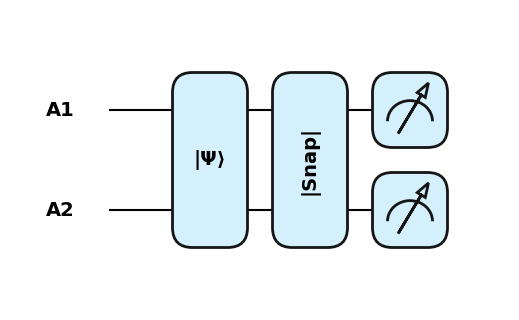

Result:


{'Final state': array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]),
 'execution_results': array([0., 0., 1., 0.])}

In [4]:
@qml.qnode(dev)
def TowTensorState(state2qubits):
    qml.AmplitudeEmbedding(features=state2qubits, wires=['A1', 'A2'], normalize=True) #Normalize so that <psi|psi>=1
    # qml.QubitStateVector(state = state2qubits, wires=['A1', 'A2'])
    qml.Snapshot('Final state')
    return qml.probs(wires=['A1', 'A2'])

state = [0, 0, 1, 0] # [1, 0, 0, 0] -> 00, [0, 1, 0, 0] -> 01, [0, 0, 1, 0] -> 10, [0, 0, 0, 1] -> 11,

qml.draw_mpl(TowTensorState)(state2qubits = state)
pp.show()

print('Result:')
qml.snapshots(TowTensorState)(state2qubits = state) # Only at simulation level.
# TowTensorState(state2qubits = state)

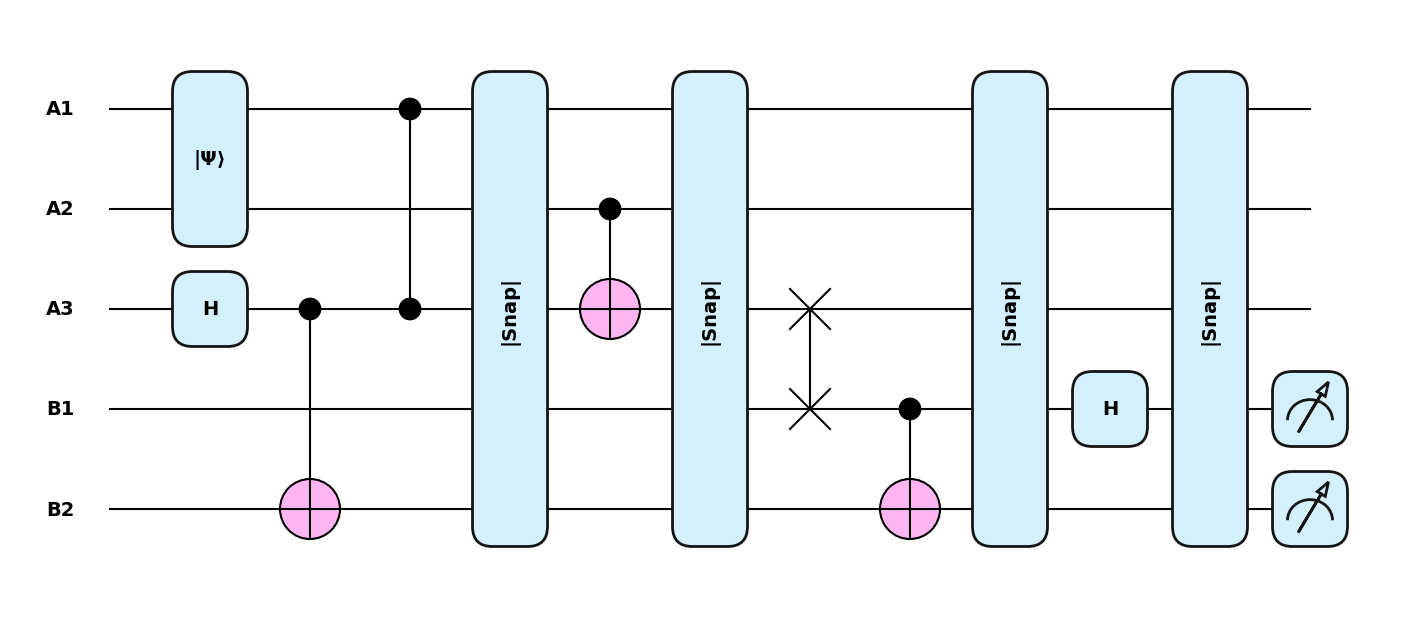

Result:


{'state 1': array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j]),
 'state 2': array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j,
        0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 

In [5]:
@qml.qnode(dev)
def SuperdenseCoding(state2qubits):
    qml.AmplitudeEmbedding(features=state2qubits, wires=['A1', 'A2'], normalize=True) #Normalize so that <psi|psi>=1
    # qml.QubitStateVector(state = state2qubits, wires=['A1', 'A2'])
    qml.Hadamard(wires='A3')
    qml.CNOT(wires=['A3', 'B2'])
    qml.CZ(wires=['A1', 'A3'])
    qml.Snapshot('state 1')
    qml.CNOT(wires=['A2', 'A3'])
    qml.Snapshot('state 2')
    qml.SWAP(wires=['A3', 'B1'])
    qml.CNOT(wires=['B1', 'B2'])
    qml.Snapshot('state 3')
    qml.Hadamard(wires='B1')
    qml.Snapshot('final state')    

    return qml.probs(wires=['B1', 'B2'])

# state = [np.sqrt(0.1), np.sqrt(0.2), np.sqrt(0.4), np.sqrt(0.3)]
state = [0, 1, 0, 0] # [1, 0, 0, 0] -> 00, [0, 1, 0, 0] -> 01, [0, 0, 1, 0] -> 10, [0, 0, 0, 1] -> 11,

qml.draw_mpl(SuperdenseCoding)(state2qubits = state)
pp.show()

print('Result:')
qml.snapshots(SuperdenseCoding)(state2qubits = state) # Only at simulation level.
# SuperdenseCoding(state2qubits = state)